In [211]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))

    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.style.use("seaborn-v0_8-darkgrid")
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

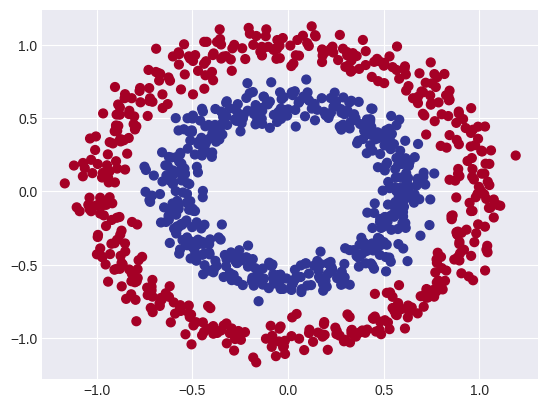

In [215]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.07, factor=0.6)
X, y = torch.Tensor(X), torch.Tensor(y)

plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [214]:
torch.manual_seed(12)

class CirclesModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1)
        )
    
    def forward(self, X):
        return self.network.forward(X)

model = CirclesModelV1()

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.8)

In [216]:
epochs = 500

for epoch in range(epochs):
    model.train(True)
    y_pred = model.forward(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad(True)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.6972305178642273
Epoch: 100 | Loss: 0.5516840219497681
Epoch: 200 | Loss: 0.4805051386356354
Epoch: 300 | Loss: 0.13336686789989471
Epoch: 400 | Loss: 0.07673667371273041


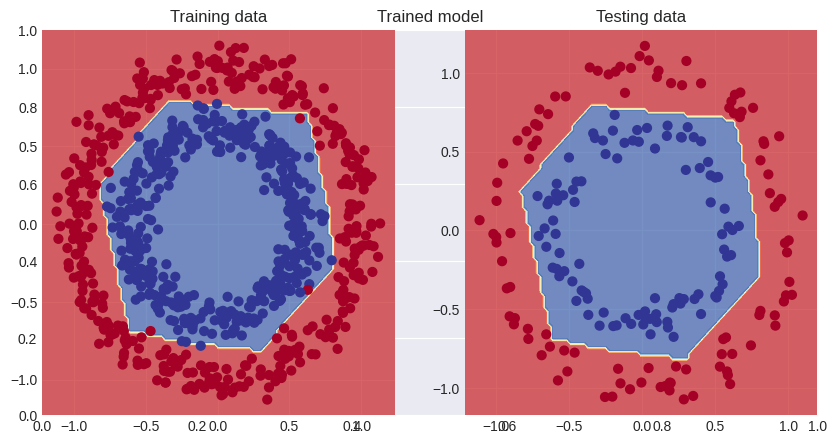

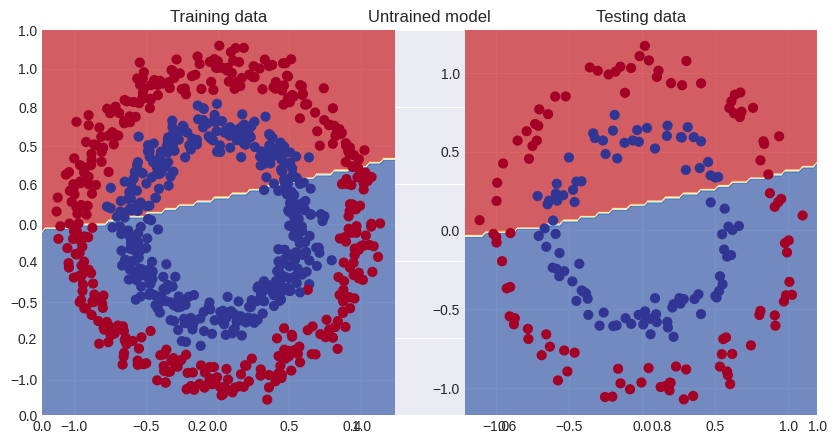

In [217]:
torch.manual_seed(12)
untrained_model = CirclesModelV1()

plt.figure(figsize=(10, 5))
plt.title("Trained model")
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model, X_test, y_test)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Untrained model")
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(untrained_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(untrained_model, X_test, y_test)
plt.show()